## Importing libaries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
# create dataframe after reading from csv
credit_data = pd.read_csv('creditcard.csv')

## Check rows and columns

In [3]:
credit_data.shape

(284807, 31)

## Structure of dataset

In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## Sample rows and columns

In [5]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#check duplicates
credit_data = credit_data.drop_duplicates()

## Missing value treatment

In [7]:
#missing values
credit_data.isnull().sum()*100/len(credit_data.index)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

## Univariate Analysis

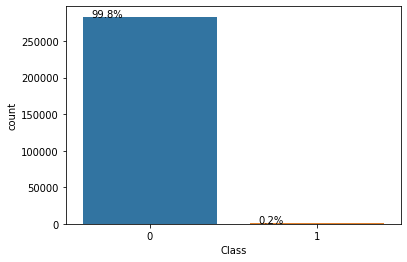

In [8]:
#Fraud data imbalance
ax = sns.countplot(x=credit_data['Class'],data=credit_data)
for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(credit_data))), (p.get_x()+0.05, p.get_height()+20))

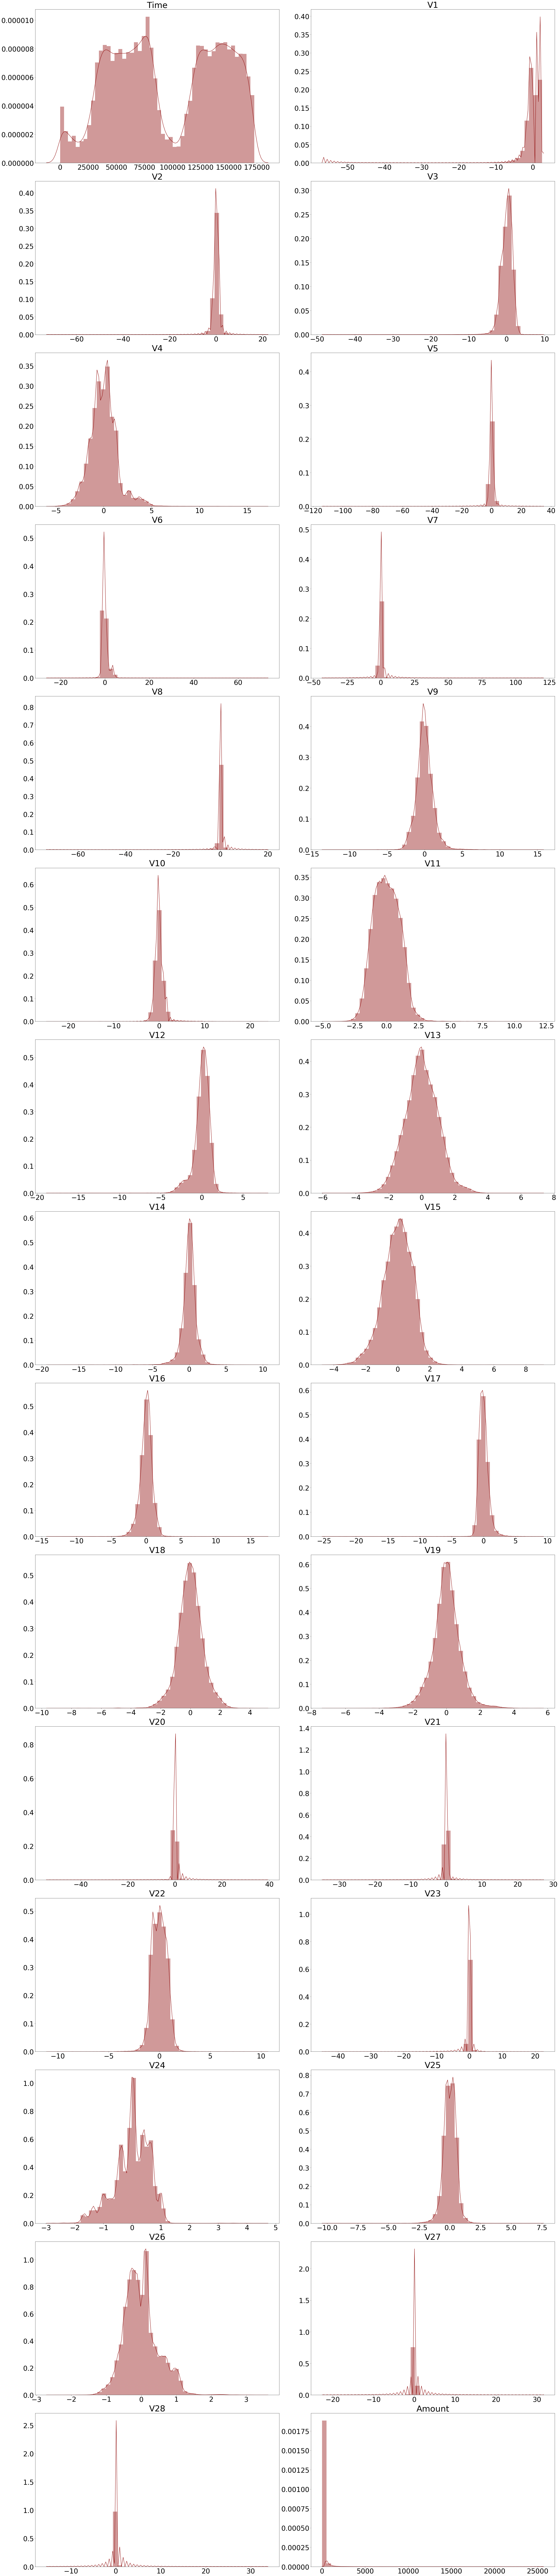

In [9]:
#Plot histogram of numerical variables 
fig, axes = plt.subplots(nrows = 15, ncols = 2, figsize = (40, 200))
for ax, column in zip(axes.flatten(), credit_data.columns):
    sns.distplot(credit_data[column], ax = ax, color = 'darkred')
    ax.set_title(column, fontsize = 43)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

#### All of the numerical variables are gaussian distribution with a degree of skewness

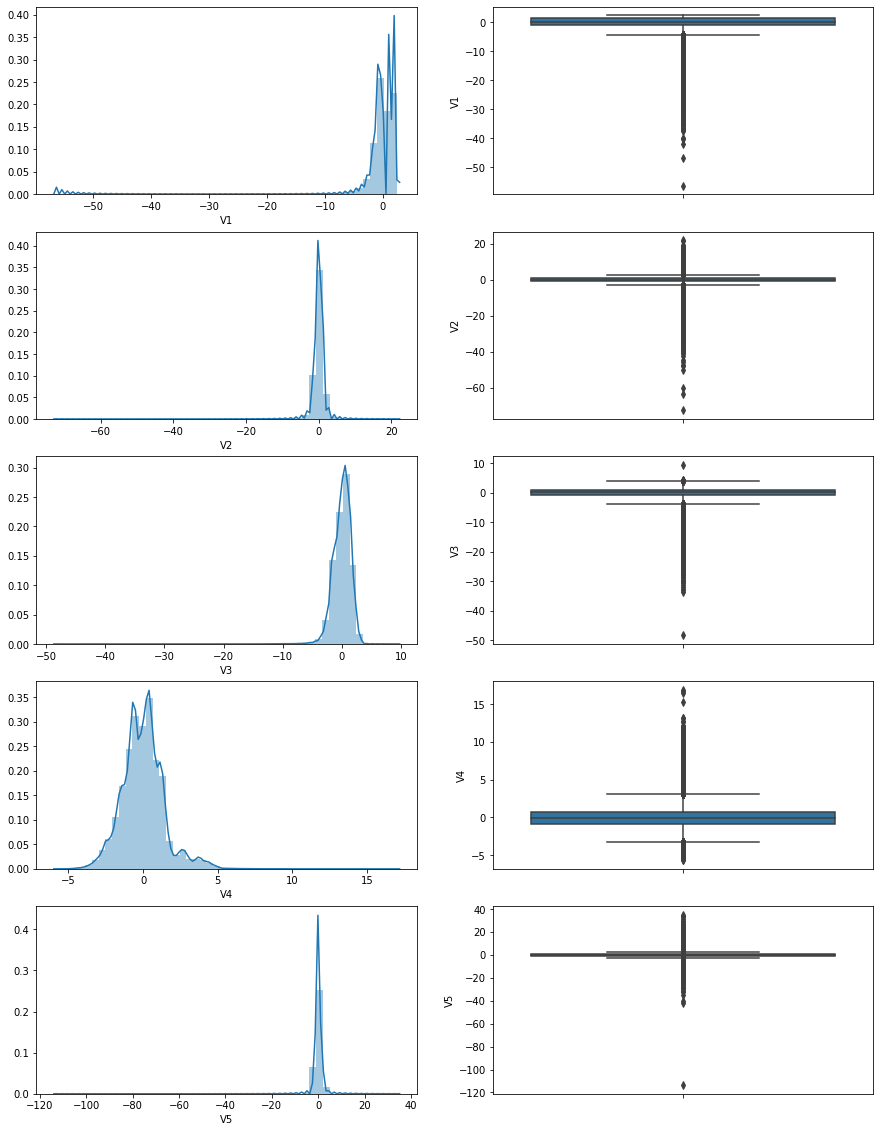

In [10]:
#Univariate analysis of numerical variables[v1 to v5]
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
sns.distplot(credit_data['V1'])
plt.subplot(5,2,2)
sns.boxplot(credit_data['V1'],orient='v')
plt.subplot(5,2,3)
sns.distplot(credit_data['V2'])
plt.subplot(5,2,4)
sns.boxplot(credit_data['V2'],orient='v')
plt.subplot(5,2,5)
sns.distplot(credit_data['V3'])
plt.subplot(5,2,6)
sns.boxplot(credit_data['V3'],orient='v')
plt.subplot(5,2,7)
sns.distplot(credit_data['V4'])
plt.subplot(5,2,8)
sns.boxplot(credit_data['V4'],orient='v')
plt.subplot(5,2,9)
sns.distplot(credit_data['V5'])
plt.subplot(5,2,10)
sns.boxplot(credit_data['V5'],orient='v')    

### Findings
#### 1. V1 to V5 have gaussian distribution since they are principal components with a degree of skewness - 
#### 2. Presence of outliers in all of them

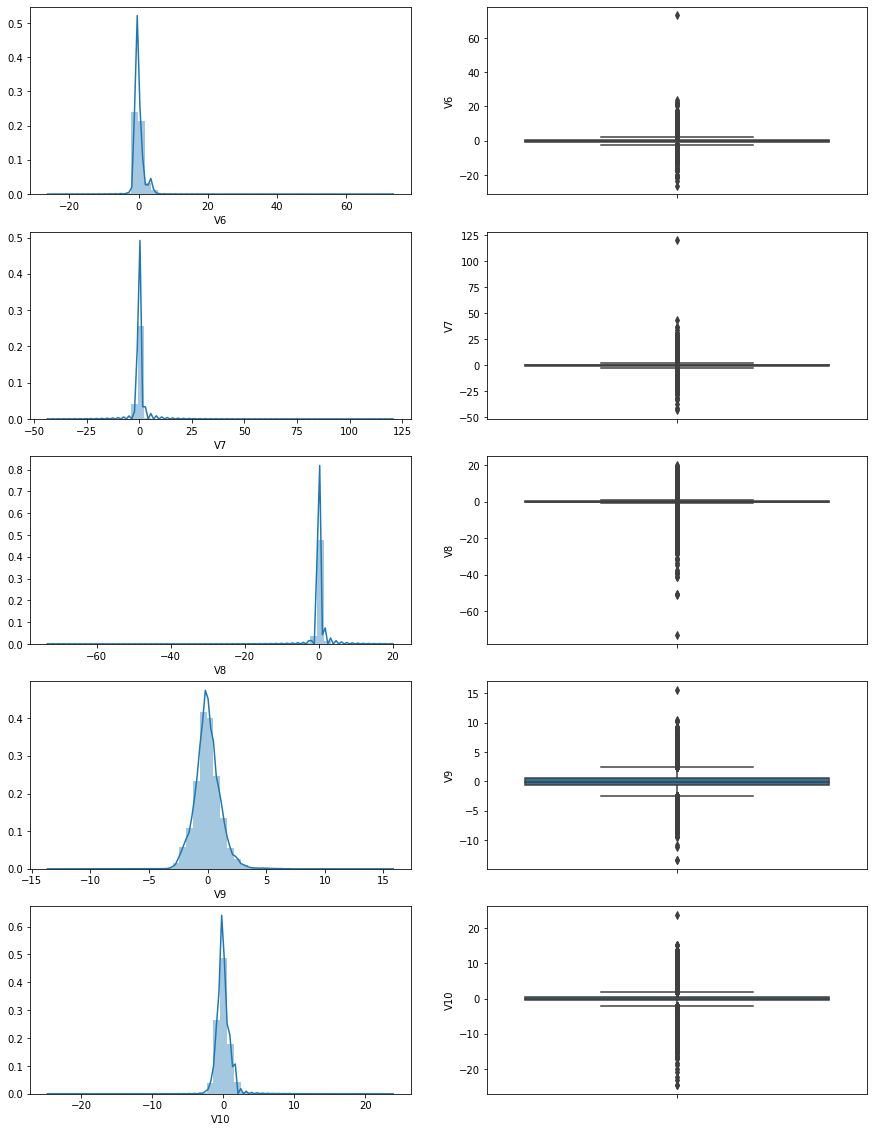

In [11]:
#Univariate analysis of numerical variables[v6 to v10]
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
sns.distplot(credit_data['V6'])
plt.subplot(5,2,2)
sns.boxplot(credit_data['V6'],orient='v')
plt.subplot(5,2,3)
sns.distplot(credit_data['V7'])
plt.subplot(5,2,4)
sns.boxplot(credit_data['V7'],orient='v')
plt.subplot(5,2,5)
sns.distplot(credit_data['V8'])
plt.subplot(5,2,6)
sns.boxplot(credit_data['V8'],orient='v')
plt.subplot(5,2,7)
sns.distplot(credit_data['V9'])
plt.subplot(5,2,8)
sns.boxplot(credit_data['V9'],orient='v')
plt.subplot(5,2,9)
sns.distplot(credit_data['V10'])
plt.subplot(5,2,10)
sns.boxplot(credit_data['V10'],orient='v') 

### Findings
#### 1. V6 to V10 have gaussian distribution since they are principal components with a degree of skewness - 
#### 2. Presence of outliers in all of them

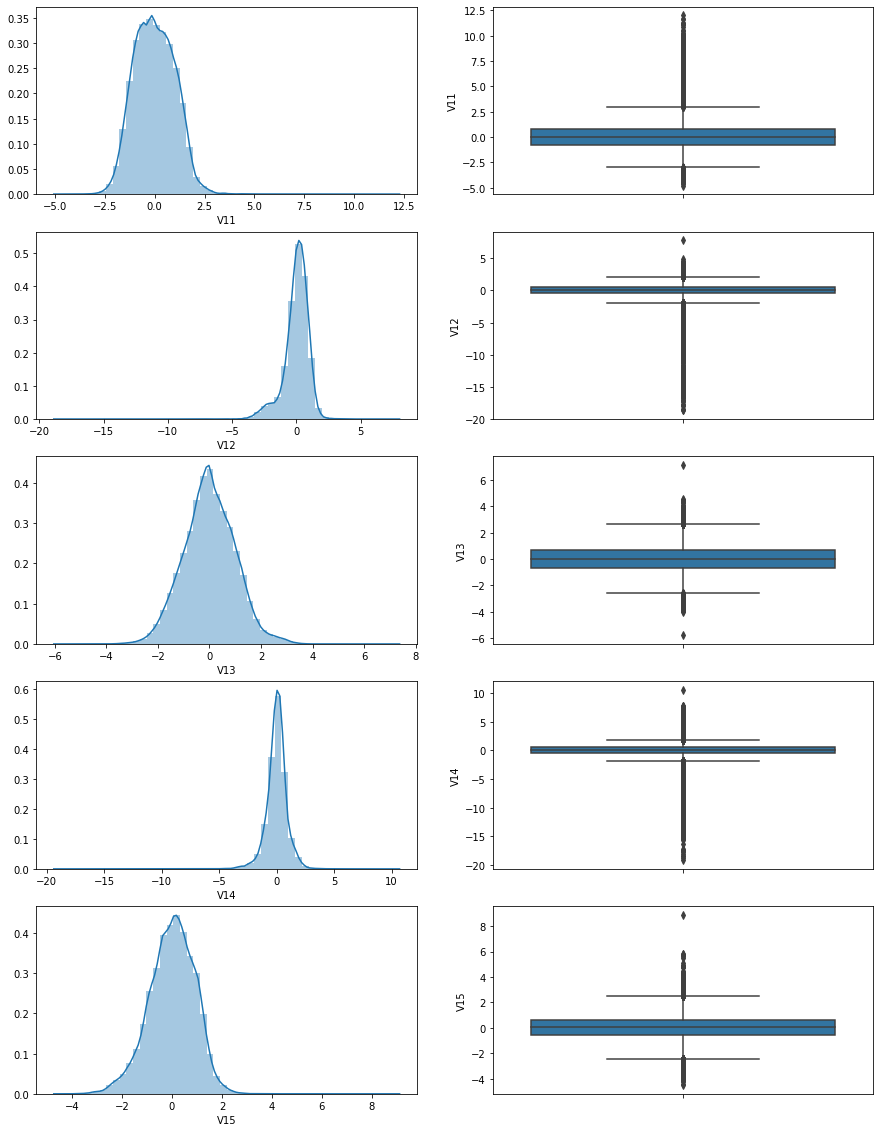

In [12]:
#Univariate analysis of numerical variables[v11 to v15]
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
sns.distplot(credit_data['V11'])
plt.subplot(5,2,2)
sns.boxplot(credit_data['V11'],orient='v')
plt.subplot(5,2,3)
sns.distplot(credit_data['V12'])
plt.subplot(5,2,4)
sns.boxplot(credit_data['V12'],orient='v')
plt.subplot(5,2,5)
sns.distplot(credit_data['V13'])
plt.subplot(5,2,6)
sns.boxplot(credit_data['V13'],orient='v')
plt.subplot(5,2,7)
sns.distplot(credit_data['V14'])
plt.subplot(5,2,8)
sns.boxplot(credit_data['V14'],orient='v')
plt.subplot(5,2,9)
sns.distplot(credit_data['V15'])
plt.subplot(5,2,10)
sns.boxplot(credit_data['V15'],orient='v') 

### Findings
#### 1. V11 to V15 have gaussian distribution since they are principal components with a degree of skewness - 
#### 2. Presence of outliers in all of them

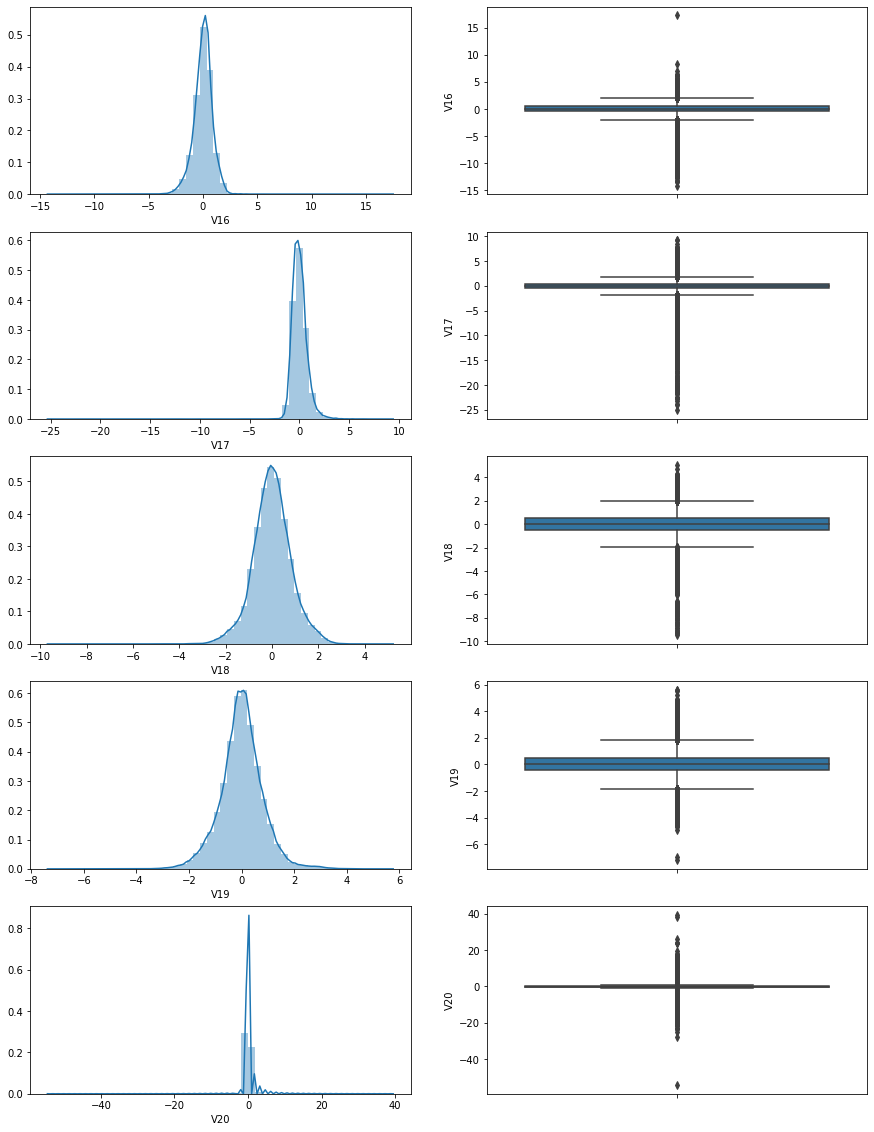

In [13]:
#Univariate analysis of numerical variables[v16 to v20]
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
sns.distplot(credit_data['V16'])
plt.subplot(5,2,2)
sns.boxplot(credit_data['V16'],orient='v')
plt.subplot(5,2,3)
sns.distplot(credit_data['V17'])
plt.subplot(5,2,4)
sns.boxplot(credit_data['V17'],orient='v')
plt.subplot(5,2,5)
sns.distplot(credit_data['V18'])
plt.subplot(5,2,6)
sns.boxplot(credit_data['V18'],orient='v')
plt.subplot(5,2,7)
sns.distplot(credit_data['V19'])
plt.subplot(5,2,8)
sns.boxplot(credit_data['V19'],orient='v')
plt.subplot(5,2,9)
sns.distplot(credit_data['V20'])
plt.subplot(5,2,10)
sns.boxplot(credit_data['V20'],orient='v') 

### Findings
#### 1. V16 to V20 have gaussian distribution since they are principal components with a degree of skewness - 
#### 2. Presence of outliers in all of them

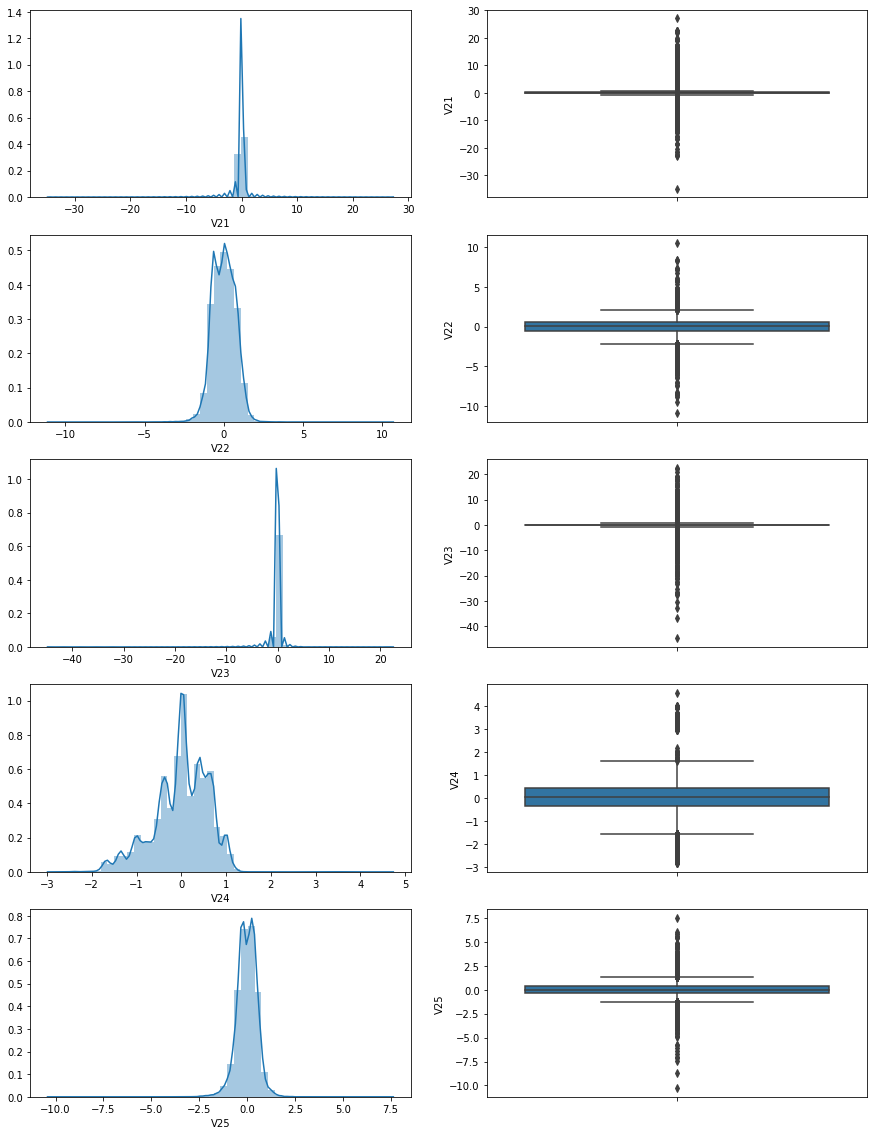

In [14]:
#Univariate analysis of numerical variables[v21 to v25]
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
sns.distplot(credit_data['V21'])
plt.subplot(5,2,2)
sns.boxplot(credit_data['V21'],orient='v')
plt.subplot(5,2,3)
sns.distplot(credit_data['V22'])
plt.subplot(5,2,4)
sns.boxplot(credit_data['V22'],orient='v')
plt.subplot(5,2,5)
sns.distplot(credit_data['V23'])
plt.subplot(5,2,6)
sns.boxplot(credit_data['V23'],orient='v')
plt.subplot(5,2,7)
sns.distplot(credit_data['V24'])
plt.subplot(5,2,8)
sns.boxplot(credit_data['V24'],orient='v')
plt.subplot(5,2,9)
sns.distplot(credit_data['V25'])
plt.subplot(5,2,10)
sns.boxplot(credit_data['V25'],orient='v') 

### Findings
#### 1. V21 to V25 have gaussian distribution since they are principal components with a degree of skewness - 
#### 2. Presence of outliers in all of them

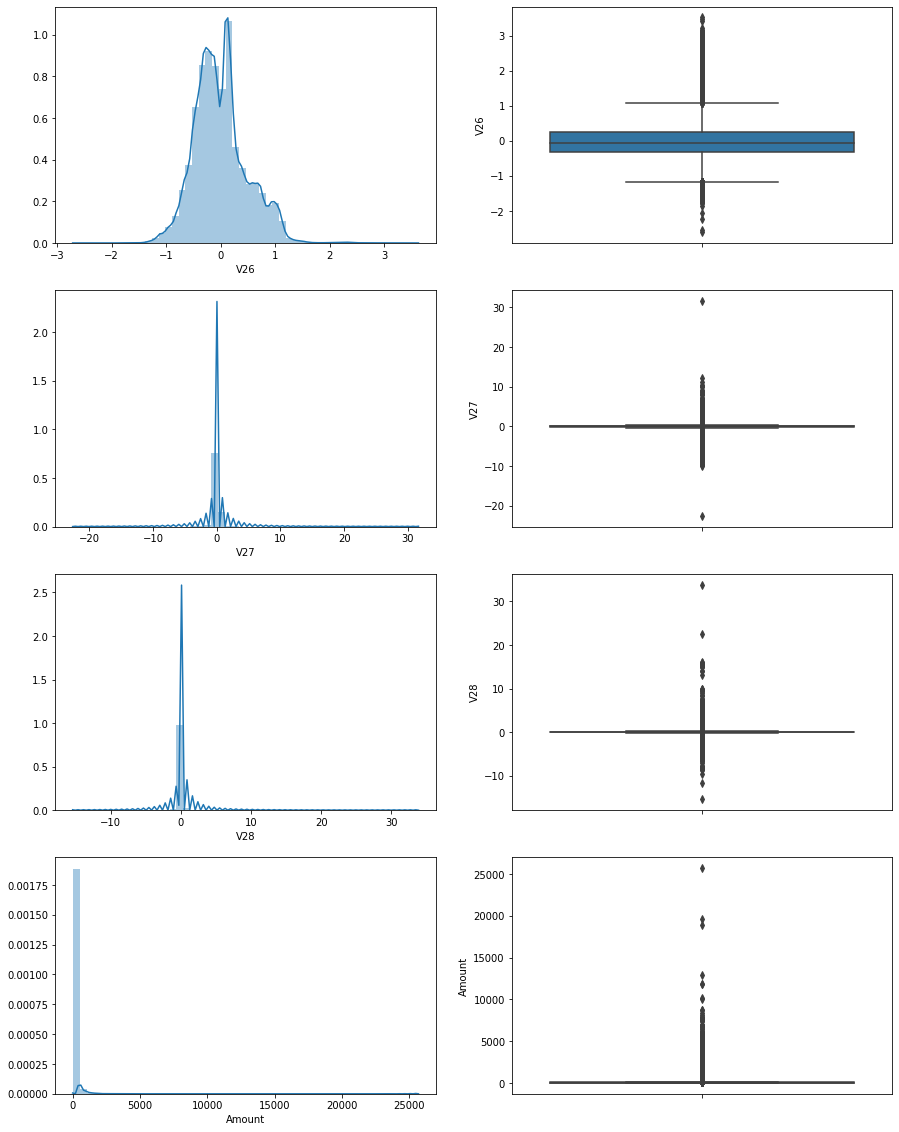

In [15]:
#Univariate analysis of numerical variables[v26 to v28]
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(credit_data['V26'])
plt.subplot(4,2,2)
sns.boxplot(credit_data['V26'],orient='v')
plt.subplot(4,2,3)
sns.distplot(credit_data['V27'])
plt.subplot(4,2,4)
sns.boxplot(credit_data['V27'],orient='v')
plt.subplot(4,2,5)
sns.distplot(credit_data['V28'])
plt.subplot(4,2,6)
sns.boxplot(credit_data['V28'],orient='v')
plt.subplot(4,2,7)
sns.distplot(credit_data['Amount'])
plt.subplot(4,2,8)
sns.boxplot(credit_data['Amount'],orient='v') 

### Findings
#### 1. V26 to V28 have gaussian distribution since they are principal components with a degree of skewness - 
#### 2. Amount is not a principal component and is a raw column
#### 3. Presence of outliers in all of them

## Bivariate Analysis

### Findings: Since they are principal components, there is very low degree of correlation between the variables 

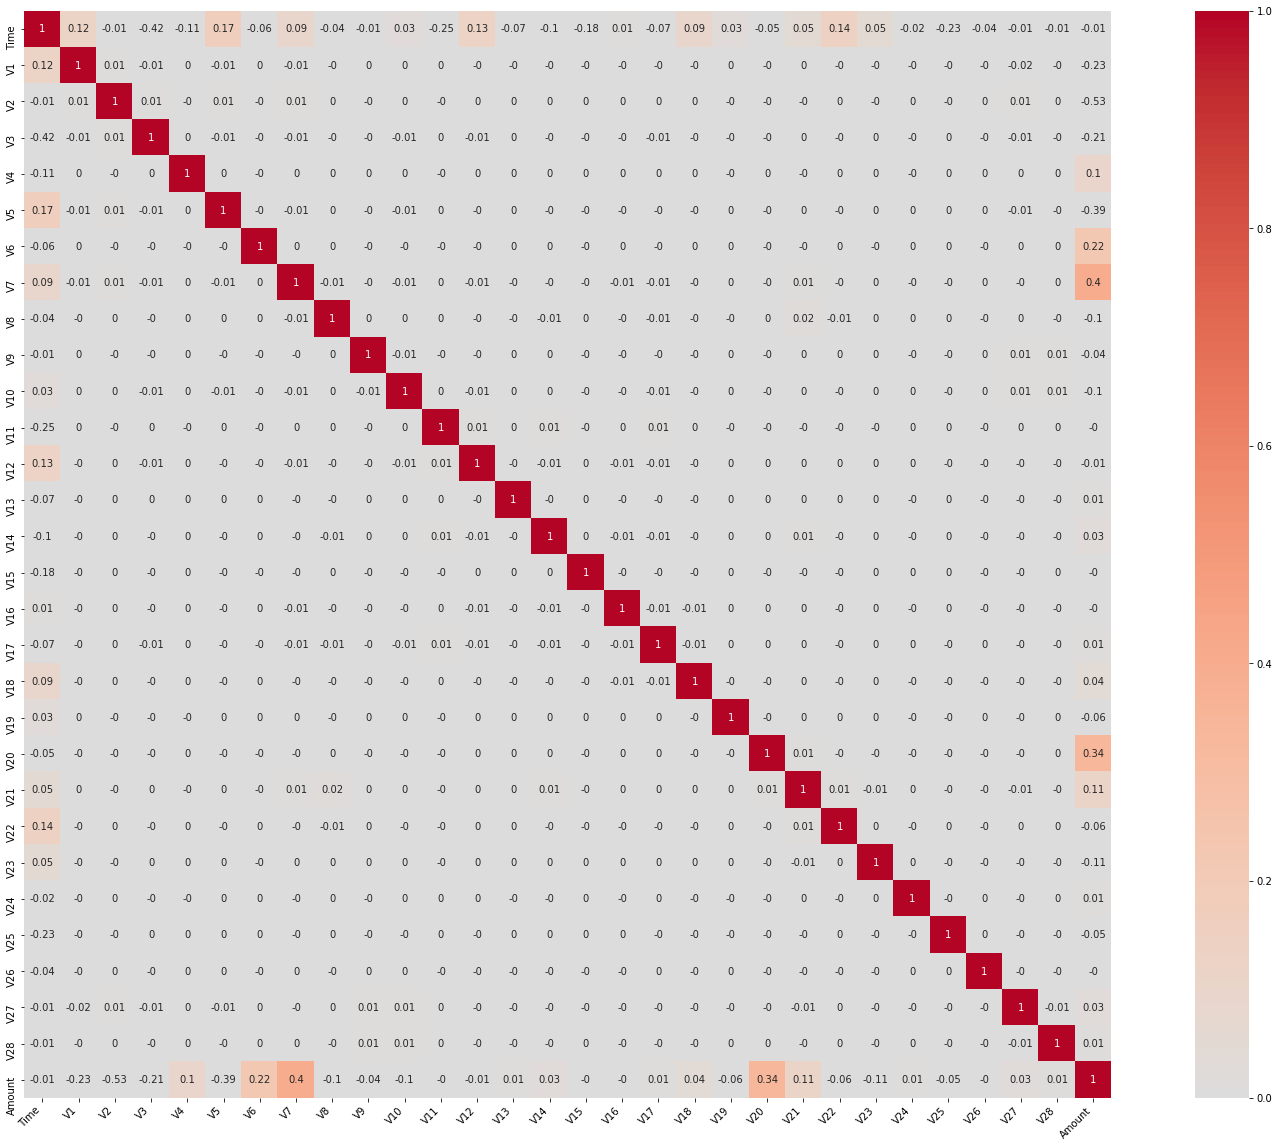

In [16]:
#check correlation between columns
fig, ax = plt.subplots(figsize=(30,20)) 
corr = round(credit_data.select_dtypes(include='float64').corr(),2)
ax = sns.heatmap(corr,
    annot=True,
    vmin=0, vmax=1, center=0,
    cmap= 'coolwarm',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

# Divide into x and y

In [17]:
# divide into X and y
from sklearn.model_selection import train_test_split
Y = credit_data.pop('Class')
x = credit_data

# Check skewness

In [18]:
skewValue = x.select_dtypes(include='float64').skew(axis=0)
skewValue

Time      -0.035581
V1        -3.273271
V2        -4.695162
V3        -2.151984
V4         0.671504
V5        -2.414079
V6         1.829880
V7         2.890271
V8        -8.310970
V9         0.537663
V10        1.252967
V11        0.344074
V12       -2.199008
V13        0.064293
V14       -1.918804
V15       -0.309659
V16       -1.051161
V17       -3.690497
V18       -0.248661
V19        0.108312
V20       -2.043121
V21        2.820033
V22       -0.182330
V23       -5.867221
V24       -0.552129
V25       -0.415744
V26        0.580292
V27       -0.753804
V28       11.555115
Amount    16.978803
dtype: float64

# High degree of skewness - take all information except the target variable

In [19]:
credit_data_log = x

In [20]:
credit_data_log.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


# Power Transformation using yeo-johnson rule

In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit_transform(credit_data_log)

array([[-2.43503024, -0.90851662, -0.13110928, ...,  0.32611099,
        -0.05517531,  1.11787259],
       [-2.43503024,  0.62575444,  0.0949148 , ..., -0.0382699 ,
         0.05655694, -1.12904047],
       [-2.43477158, -0.90794139, -0.8739653 , ..., -0.15587477,
        -0.17660489,  1.62243036],
       ...,
       [ 1.53557445,  1.30859543, -0.27514021, ..., -0.00410182,
        -0.07242172,  0.67432913],
       [ 1.53557445, -0.39781253,  0.2808001 , ...,  0.26257485,
         0.33482472, -0.42835564],
       [ 1.53564527, -0.54774077, -0.20558907, ..., -0.02157511,
         0.05320643,  1.3221552 ]])

In [22]:
credit_data_log.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.435030,-0.908517,-0.131109,2.174201,0.986309,-0.257317,0.460075,0.195593,0.022528,0.382316,...,0.323745,-0.009113,0.368766,-0.190040,0.014889,0.212398,-0.323989,0.326111,-0.055175,1.117873
1,-2.435030,0.625754,0.094915,-0.033947,0.389851,0.031415,0.046651,-0.063677,0.008792,-0.183999,...,-0.093514,-0.302964,-0.885006,0.153295,-0.637695,0.288921,0.353565,-0.038270,0.056557,-1.129040
2,-2.434772,-0.907941,-0.873965,1.381479,0.343686,-0.376027,1.321920,0.643991,0.176162,-1.455515,...,0.681493,0.360668,1.070494,1.502750,-1.133754,-0.653256,-0.209921,-0.155875,-0.176605,1.622430
3,-2.434772,-0.745930,-0.202749,1.401190,-0.579730,-0.019788,0.984293,0.193974,0.314385,-1.321162,...,-0.273716,-0.135973,-0.011101,-0.318214,-1.757165,1.276986,-0.400100,0.144505,0.201741,1.011323
4,-2.434542,-0.827019,0.535699,1.161194,0.359431,-0.306955,0.188177,0.482810,-0.333172,0.772533,...,0.529069,0.003346,1.108704,-0.233430,0.145653,-0.428861,1.053957,0.547559,0.673579,0.691723


In [23]:
#missing values remains the same
credit_data_log.isnull().sum()*100/len(credit_data_log.index)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
dtype: float64

In [24]:
#check skewness again after log transformation
skewValue = credit_data_log.select_dtypes(include='float64').skew(axis=0)
skewValue

Time     -0.229517
V1       -0.218575
V2        0.335603
V3       -0.078673
V4        0.018864
V5       -1.220150
V6       -1.942118
V7        2.434526
V8        2.360907
V9       -0.043500
V10      -1.244980
V11       0.059474
V12       0.156863
V13       0.006184
V14       0.100310
V15       0.013195
V16       0.135621
V17      -0.827070
V18      -0.058512
V19       0.015099
V20      -0.933071
V21      -1.955269
V22      -0.020014
V23      -0.270709
V24       0.112562
V25       0.077728
V26      -0.024237
V27       3.059457
V28       0.909668
Amount    0.018234
dtype: float64

In [25]:
#reassign to dependent variable before train test split
x = credit_data_log

# Split into train test dataset

In [26]:
# We have to specify this in order to make sure the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x,Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
#structure of train dataset
X_train.shape

(198608, 30)

In [28]:
y_train.shape

(198608,)

# Model 1: Logistic Regression without SMOTE

In [29]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logregmodel = logreg.fit(X_train,y_train)

In [30]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score

In [31]:
#Predict and calculate the accuracy and auc score
pred_test = logregmodel.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, pred_test))
print(roc_auc_score(y_test, pred_test))

0.9992246058413027
0.8071483490510701


In [32]:
# classification report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.93      0.61      0.74       153

    accuracy                           1.00     85118
   macro avg       0.96      0.81      0.87     85118
weighted avg       1.00      1.00      1.00     85118



In [33]:
# Printing confusion matrix
# Highly imbalanced dataset
print(confusion_matrix(y_test,pred_test))

[[84958     7]
 [   59    94]]


Fraud-Non-Fraud Rate predicted:(Specificity) ==> 0.9306930693069307
Fraud Rate predicted:(Sensitivity) ==> 0.9993060211487115


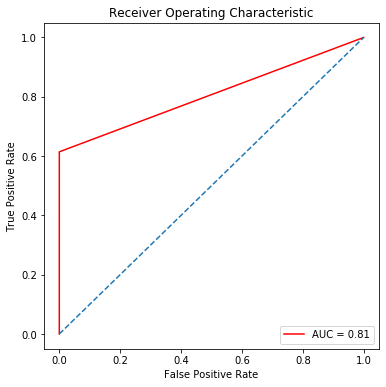

In [34]:
#Define a function for getting the metrics

def CheckKPI(y_test,y_pred):
    TP = (confusion_matrix(y_test,pred_test))[0][0]
    FP = (confusion_matrix(y_test,y_pred))[0][1]
    FN = (confusion_matrix(y_test,y_pred))[1][0]
    TN = (confusion_matrix(y_test,y_pred))[1][1]
    print("Fraud-Non-Fraud Rate predicted:(Specificity) ==> {}".format(TN/(TN+FP)))
    print("Fraud Rate predicted:(Sensitivity) ==> {}".format(TP/(TP+FN)))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(6,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
CheckKPI(y_test,pred_test)

# AUC Score for vanilla logistic Regression = 0.81

# Model 2: Logistic Regression with Regularization

In [35]:
# GridSearchCV to find optimal hyper parameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [36]:
# Create regularization penalty 
penalty = ['l1', 'l2']

# Create regularization hyperparameter 
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyper_param = dict(C=C, penalty=penalty)

In [37]:
logregmodel_reg = LogisticRegression()
# Create grid search using 5-fold cross validation

logreg_model = GridSearchCV(logregmodel_reg, hyper_param, cv=5, verbose=0)

In [38]:
# Fit grid search
best_model = logreg_model.fit(X_train, y_train)

In [39]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


In [40]:
# Predict target variable using the above hyperparameter
logreg_final = LogisticRegression(penalty='l1',C=1)
result = logreg_final.fit(X_train,y_train)
pred_test=logreg.predict(X_test)

In [41]:
# Print the accuracy
print (metrics.accuracy_score(y_test, pred_test))
print(roc_auc_score(y_test, pred_test))

0.9992246058413027
0.8071483490510701


In [42]:
# classification_report of our default model
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.93      0.61      0.74       153

    accuracy                           1.00     85118
   macro avg       0.96      0.81      0.87     85118
weighted avg       1.00      1.00      1.00     85118



[[84958     7]
 [   59    94]]
Fraud-Non-Fraud Rate predicted:(Specificity) ==> 0.9306930693069307
Fraud Rate predicted:(Sensitivity) ==> 0.9993060211487115


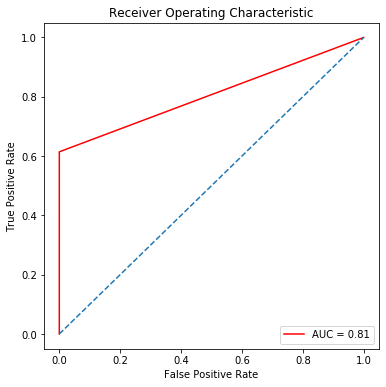

In [43]:
# Printing confusion matrix
print(confusion_matrix(y_test,pred_test))
CheckKPI(y_test,pred_test)

# AUC Score for vanilla logistic Regression = 0.81

# Model 3: Using Support Vector Machine without SMOTE


In [44]:
#Importing the libraries and running it for linear kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
#checking predictions using this SVM model
predictions = svclassifier.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.85      0.78      0.82       153

    accuracy                           1.00     85118
   macro avg       0.93      0.89      0.91     85118
weighted avg       1.00      1.00      1.00     85118



Fraud-Non-Fraud Rate predicted:(Specificity) ==> 0.851063829787234
Fraud Rate predicted:(Sensitivity) ==> 0.9996117235942629


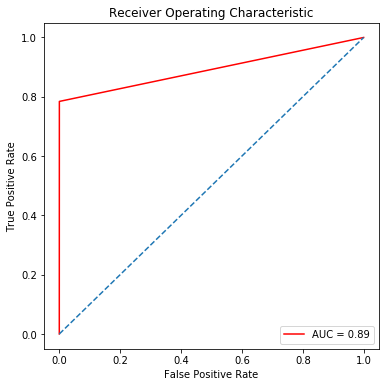

In [46]:
#check accuracy metrics
CheckKPI(y_test,predictions)

In [47]:
# Decision Tree

In [48]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [49]:
# Fitting the decision tree with default hyperparameters, except for max_depth which is 5 .
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
# Making predictions
predictions = dt_default.predict(X_test)

In [51]:
#Check accuracy
print("Accuracy for the prediction is: ",accuracy_score(y_test,predictions))

Accuracy for the prediction is:  0.9993303414083977


[[84945    20]
 [   37   116]]
Fraud-Non-Fraud Rate predicted:(Specificity) ==> 0.8529411764705882
Fraud Rate predicted:(Sensitivity) ==> 0.9995646802753103


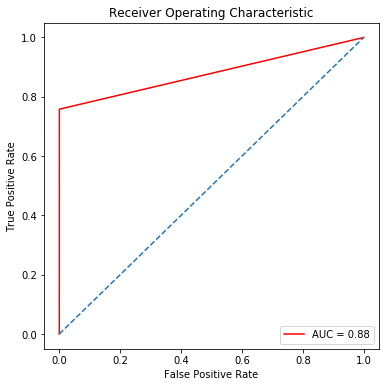

In [52]:
#Print Confusion Matrix
print(confusion_matrix(y_test,predictions))
CheckKPI(y_test,predictions)

In [53]:
# Let's check the report of the model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.85      0.76      0.80       153

    accuracy                           1.00     85118
   macro avg       0.93      0.88      0.90     85118
weighted avg       1.00      1.00      1.00     85118



In [54]:
#Hyperparameter tuning

In [55]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

In [56]:
# Instantiate the grid search model
model = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

In [57]:
# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 12.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [58]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_dt.best_score_,'using',grid_search_dt.best_params_)

We can get accuracy of 0.9994058648191412 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 50}


In [59]:
dt_md = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)

In [60]:
dt_md.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [61]:
# Making predictions
predictions = dt_md.predict(X_test)

print("Accuracy for the prediction is: ",accuracy_score(y_test,predictions))

Accuracy for the prediction is:  0.9993185930120538


[[84944    21]
 [   37   116]]
Fraud-Non-Fraud Rate predicted:(Specificity) ==> 0.8467153284671532
Fraud Rate predicted:(Sensitivity) ==> 0.9995646802753103


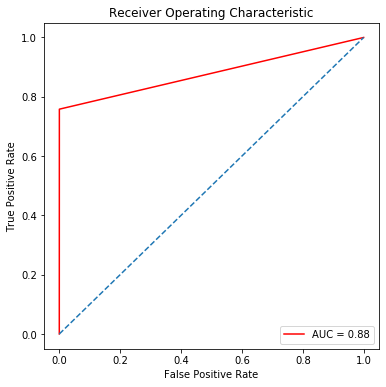

In [62]:
#Print Confusion Matrix
print(confusion_matrix(y_test,predictions))
CheckKPI(y_test,predictions)

In [63]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [64]:
# fitting the model
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# Making predictions
predictions = rfc.predict(X_test)

print("Accuracy for the prediction is: ",accuracy_score(y_test,predictions))

Accuracy for the prediction is:  0.9994948189572124


[[84954    11]
 [   32   121]]
Fraud-Non-Fraud Rate predicted:(Specificity) ==> 0.9166666666666666
Fraud Rate predicted:(Sensitivity) ==> 0.9996234851158959


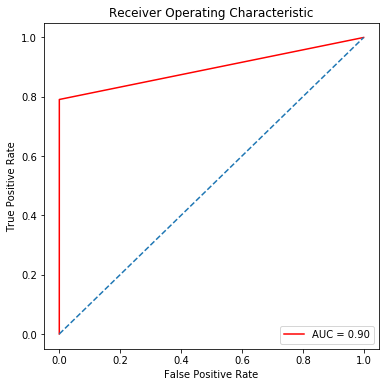

In [66]:
#Print Confusion Matrix
print(confusion_matrix(y_test,predictions))
CheckKPI(y_test,predictions)

In [67]:
# Let's check the report of the model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.92      0.79      0.85       153

    accuracy                           1.00     85118
   macro avg       0.96      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



In [68]:
# specify number of folds for k-fold CV
n_folds = 5
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

In [69]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = n_folds, n_jobs = -1,verbose = 1)


In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.9min


In [ ]:
#accuracy
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
rfc2 = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             random_state=50,
                             n_estimators=200)

In [ ]:
rfc2.fit(X_train, y_train)

In [ ]:
#check predictions
predictions=rfc2.predict(X_test)

In [ ]:
#accuracy report
print("Accuracy for the prediction is: ",accuracy_score(y_test,predictions))

In [ ]:
# Let's check the report of the model
print(classification_report(y_test,predictions))

In [ ]:
#Print Confusion Matrix
print(confusion_matrix(y_test,predictions))
CheckKPI(y_test,predictions)